In [2]:
import snn
from snn import neuralNetwork
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import importlib
importlib.reload(snn)

<module 'snn' from '/home/jean-phi/Projects/Machine-Learning/Simple_Neural_Network/snn.py'>

# Read the data from the file

In [4]:
df = pd.read_csv("./MNIST_dataset/mnist_train.csv", sep=',', header=None)

# Create the neural network

In [5]:
nn = neuralNetwork(784, 100, 10)

# Prepare the data

## Extract the target output

In [6]:
array_targetData = df.loc[:, 0].values

## Normalize the input

In [7]:
array_inputs = df.loc[:, 1:].values / 255.0 * 0.99 + 0.01

# Train the neural network

index=10
formatedTarget = np.zeros(10) + 0.01
formatedTarget[array_targetData[index]] = 0.99
for _ in range(10):
    nn.train(array_inputs[index], formatedTarget)
print('Target: ' + str(array_targetData[index]) + '\tPredicted result: ' + str(np.argmax(nn.predict(array_inputs[index]))))

In [8]:
nbEpoch = 1000
listError = []
previousError = 0
stopConvergenceCount = 0
 

for epoch in range(nbEpoch):
    error = 0
    for i in range(len(array_targetData)):
        formatedTarget = np.zeros(10) + 0.01
        formatedTarget[array_targetData[i]] = 0.99

        nn.train(array_inputs[i], formatedTarget, learningRate = 0.01)
        predictedResult = np.argmax(nn.predict(array_inputs[i]))
        if (predictedResult != array_targetData[i]):
            error += 1       

    listError.append(error)
    print('Epoch: ' + str(epoch) + '\tErrors: ' + str(error) + "\tPerformance: " + str((1 - error / len(array_targetData)) * 100) + '%')
    if error == previousError:
        print('Stop to converge in ' + str(epoch) + ' epochs')
        stopConvergenceCount += 1
        if stopConvergenceCount > 5:
            break
    else:
        stopConvergenceCount = 0
    previousError = error
        

Epoch: 0	Errors: 4870	Performance: 91.88333333333334%
Epoch: 1	Errors: 3248	Performance: 94.58666666666666%
Epoch: 2	Errors: 2724	Performance: 95.46%
Epoch: 3	Errors: 2361	Performance: 96.065%
Epoch: 4	Errors: 2109	Performance: 96.485%
Epoch: 5	Errors: 1890	Performance: 96.85000000000001%
Epoch: 6	Errors: 1733	Performance: 97.11166666666666%
Epoch: 7	Errors: 1580	Performance: 97.36666666666667%
Epoch: 8	Errors: 1461	Performance: 97.565%
Epoch: 9	Errors: 1347	Performance: 97.75500000000001%
Epoch: 10	Errors: 1255	Performance: 97.90833333333333%
Epoch: 11	Errors: 1174	Performance: 98.04333333333334%
Epoch: 12	Errors: 1108	Performance: 98.15333333333334%
Epoch: 13	Errors: 1044	Performance: 98.26%
Epoch: 14	Errors: 1001	Performance: 98.33166666666666%
Epoch: 15	Errors: 957	Performance: 98.405%
Epoch: 16	Errors: 913	Performance: 98.47833333333334%
Epoch: 17	Errors: 865	Performance: 98.55833333333334%
Epoch: 18	Errors: 817	Performance: 98.63833333333334%
Epoch: 19	Errors: 771	Performance: 98

Epoch: 149	Errors: 17	Performance: 99.97166666666666%
Epoch: 150	Errors: 17	Performance: 99.97166666666666%
Stop to converge in 150 epochs
Epoch: 151	Errors: 17	Performance: 99.97166666666666%
Stop to converge in 151 epochs
Epoch: 152	Errors: 17	Performance: 99.97166666666666%
Stop to converge in 152 epochs
Epoch: 153	Errors: 17	Performance: 99.97166666666666%
Stop to converge in 153 epochs
Epoch: 154	Errors: 17	Performance: 99.97166666666666%
Stop to converge in 154 epochs
Epoch: 155	Errors: 17	Performance: 99.97166666666666%
Stop to converge in 155 epochs


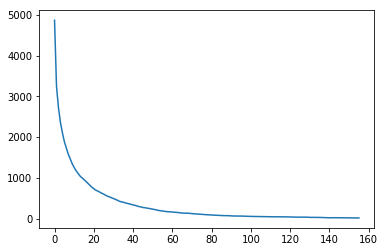

In [9]:
plt.plot(listError)
plt.show()

# Check the results on the test base 

In [10]:
df_test = pd.read_csv("./MNIST_dataset/mnist_test.csv", sep=',', header=None)

In [11]:
array_targetData_test = df_test.loc[:, 0].values
array_inputs_test = df_test.loc[:, 1:].values / 255.0 * 0.99 + 0.01

In [12]:
error = 0
for i in range(len(array_targetData_test)):
    formatedTarget = np.zeros(10) + 0.01
    formatedTarget[array_targetData_test[i]] = 0.99
    
    #nn.train(array_inputs_test[i], formatedTarget)
    predictedResult = np.argmax(nn.predict(array_inputs_test[i]))
    if (predictedResult != array_targetData_test[i]):
        error += 1
print("Performance: " + str((1 - error / len(array_targetData_test)) * 100) + '%')

Performance: 97.19%
